# Cardivascular Disease Detection

## Importing libraries and dataset

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#importing dataset
df=pd.read_csv('/content/heart.csv')

## Correlation matrix

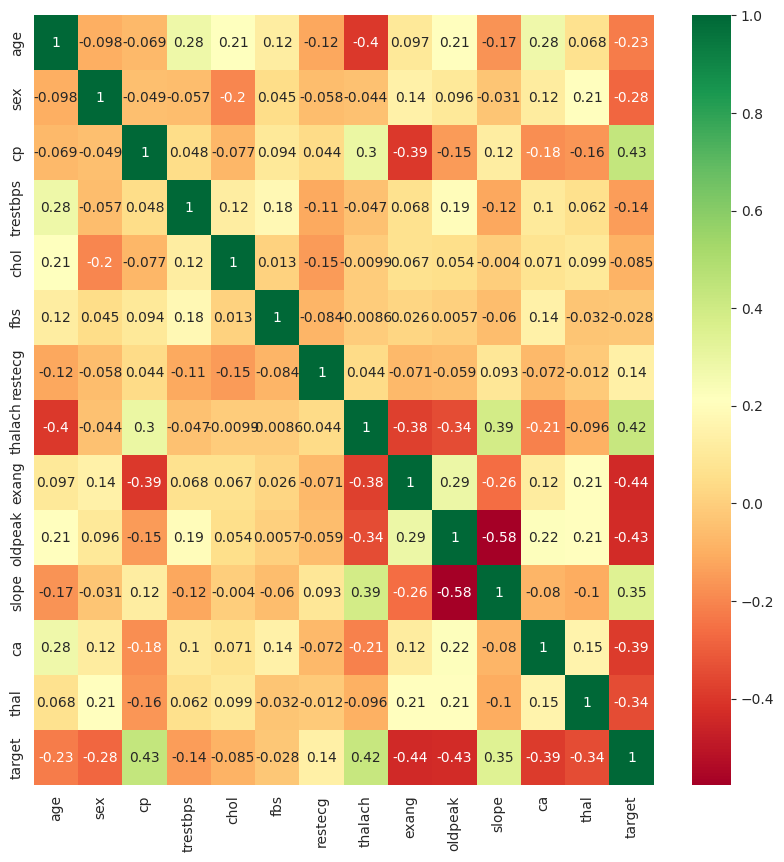

In [17]:
#get correlations of each feature in dataset
corrmat=df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data Exploration and preparation

<ipython-input-18-54f4109983cb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=df,palette='RdBu_r')


<Axes: xlabel='target', ylabel='count'>

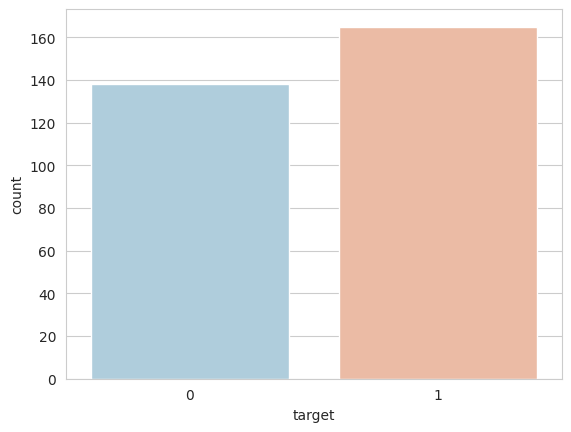

In [18]:
#checking balanced data or not
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')


In [19]:
#null correction
heart=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [20]:
#scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler=StandardScaler()
columns_to_scale=['age','trestbps','chol','thalach','oldpeak']
heart[columns_to_scale]=StandardScaler.fit_transform(heart[columns_to_scale])


In [21]:
y=heart['target']
X=heart.drop(['target'],axis=1)

In [22]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


## Logistic Regression

In [23]:
###################################################


#fitting logistic regression
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=1)
classifier_lr.fit(X_train,y_train)

#predicting results
y_pred_lr=classifier_lr.predict(X_test)
y_pred_problr = classifier_lr.decision_function(X_test)
y_pred_proba_lr=classifier_lr.predict_proba(X_test)

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test, y_pred_lr)

from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(classifier_lr,X,y,cv=10)
result_lr=score_lr.mean()

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_lr = f1_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)


###################################################

## Naive Bayes

In [24]:
#creating classifier naive bayes
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()
nb_classifier.fit(X_train,y_train)

#predicting new test results
y_pred_nb= nb_classifier.predict(X_test)
y_pred_proba_nb = nb_classifier.predict_proba(X_test)

from sklearn.metrics import confusion_matrix
cm_nb=confusion_matrix(y_test,y_pred_nb)

from sklearn.model_selection import cross_val_score
score_nb=cross_val_score(nb_classifier,X,y,cv=10)
result_nb=score_nb.mean()

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_nb = f1_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

## SVM

In [25]:
#fitting svm
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear',random_state=0,probability=True)
svm_classifier.fit(X_train,y_train)

#predicting results
y_pred_svm=svm_classifier.predict(X_test)
y_pred_probsvm = svm_classifier.decision_function(X_test)
y_pred_proba_svm=svm_classifier.predict_proba(X_test)

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_svm=confusion_matrix(y_test, y_pred_svm)

from sklearn.model_selection import cross_val_score
score_svm=cross_val_score(svm_classifier,X,y,cv=10)
result_svm=score_svm.mean()

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_svm = f1_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)


## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#knn
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):
    knn_classifier= KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train,y_train)

    score_knn=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score_knn.mean())
    y_pred_knn=knn_classifier.predict(X_test)
    y_pred_proba_knn = knn_classifier.predict_proba(X_test)

 #fitting
    knn_classifier= KNeighborsClassifier(n_neighbors=12)
score_knn=cross_val_score(knn_classifier,X,y,cv=10)

#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test, y_pred_knn)


knn_scores.append(score_knn.mean())
result_knn=score_knn.mean()


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_knn = f1_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)

## Random Forest

In [27]:
#randomforest
randomforest_classifier=RandomForestClassifier(n_estimators=1000)
randomforest_classifier.fit(X_train,y_train)
score_rf=cross_val_score(randomforest_classifier,X,y,cv=10)
y_pred_rf=randomforest_classifier.predict(X_test)
y_pred_proba_rf = randomforest_classifier.predict_proba(X_test)

from sklearn.metrics import confusion_matrix
cm_rf=confusion_matrix(y_test,y_pred_rf)

from sklearn.model_selection import cross_val_score
score_rf=cross_val_score(randomforest_classifier,X,y,cv=10)
result_rf=score_rf.mean()


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_rf = f1_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

## Decision Tree

In [28]:
#decision tree
dt_classifier = DecisionTreeClassifier(min_samples_leaf = 20)
dt_classifier = dt_classifier.fit(X_train, y_train)


y_pred_dt = dt_classifier.predict(X_test)
y_pred_proba_dt = dt_classifier.predict_proba(X_test)
#y_pred_probdt=dt_classifier.decision_function(X_test)

score_dt = accuracy_score(y_test, y_pred_dt)
result_dt=score_dt.mean()

from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_pred_dt)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
f1_dt = f1_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

## Results and plots

In [29]:
for i in range(91):
    y_pred_proba_lr[:,1][i] = round(y_pred_proba_lr[:, 1][i], 1)
    #y_pred_proba_svm[:,1][i] = round(y_pred_proba_svm[:, 1][i], 1)
    #y_pred_proba_nb[:,1][i] = round(y_pred_proba_nb[:, 1][i], 1)

In [30]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
lr_fpr,lr_tpr,threshold_lr=roc_curve(y_test, y_pred_proba_lr[:,1])
auc_lr=auc(lr_fpr, lr_tpr)

nb_fpr,nb_tpr,threshold_nb=roc_curve(y_test, y_pred_proba_nb[:,1])
auc_nb=auc(nb_fpr, nb_tpr)


svm_fpr,svm_tpr,threshold_svm=roc_curve(y_test, y_pred_proba_svm[:,1])
auc_svm=auc(svm_fpr, svm_tpr)

knn_fpr,knn_tpr,threshold_knn=roc_curve(y_test, y_pred_proba_knn[:,1])
auc_knn=auc(knn_fpr, knn_tpr)


#print(roc_auc_score(y_test,y_pred_probrf[:,1]))
rf_fpr,rf_tpr,threshold_rf=roc_curve(y_test, y_pred_proba_rf[:,1])
auc_rf=auc(rf_fpr, rf_tpr)


dt_fpr,dt_tpr,threshold_dt=roc_curve(y_test, y_pred_proba_dt[:,1])
auc_dt=auc(dt_fpr, dt_tpr)

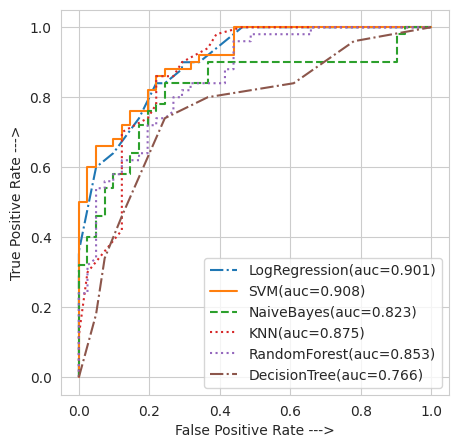

In [31]:
plt.figure(figsize=(5,5),dpi=100)

plt.plot(lr_fpr,lr_tpr,linestyle='-.',label='LogRegression(auc=%0.3f)'%auc_lr)
plt.plot(svm_fpr,svm_tpr,linestyle='-',label='SVM(auc=%0.3f)'%auc_svm)
plt.plot(nb_fpr,nb_tpr,linestyle='--',label='NaiveBayes(auc=%0.3f)'%auc_nb)
plt.plot(knn_fpr,knn_tpr,linestyle=':',label='KNN(auc=%0.3f)'%auc_knn)
plt.plot(rf_fpr,rf_tpr,linestyle='dotted',label='RandomForest(auc=%0.3f)'%auc_rf)
plt.plot(dt_fpr,dt_tpr,linestyle='-.',label='DecisionTree(auc=%0.3f)'%auc_dt)

plt.xlabel('False Positive Rate --->')
plt.ylabel('True Positive Rate --->')

plt.legend()
plt.show()

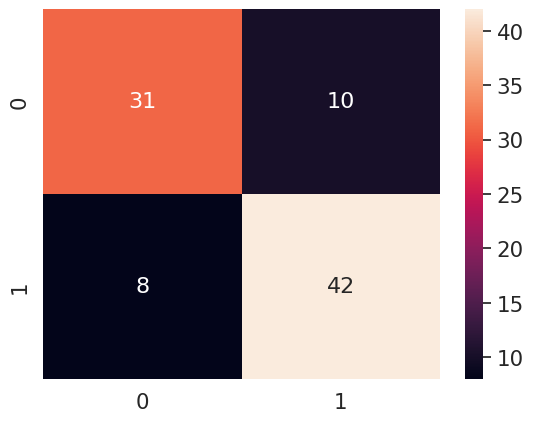

In [32]:
df_cm_lr = pd.DataFrame(cm_lr, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_lr, annot=True, annot_kws={"size": 16}) #font size


plt.show()

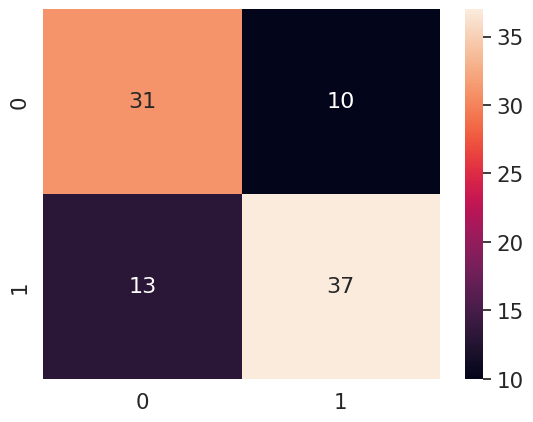

In [33]:
df_cm_dt = pd.DataFrame(cm_dt, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_dt, annot=True, annot_kws={"size": 16}) #font size


plt.show()

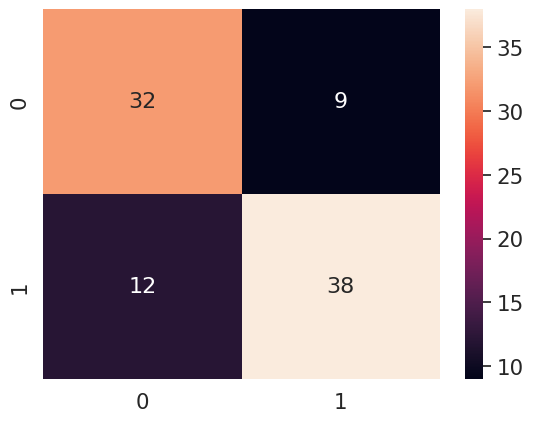

In [34]:
df_cm_nb = pd.DataFrame(cm_nb, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_nb, annot=True, annot_kws={"size": 16}) #font size


plt.show()

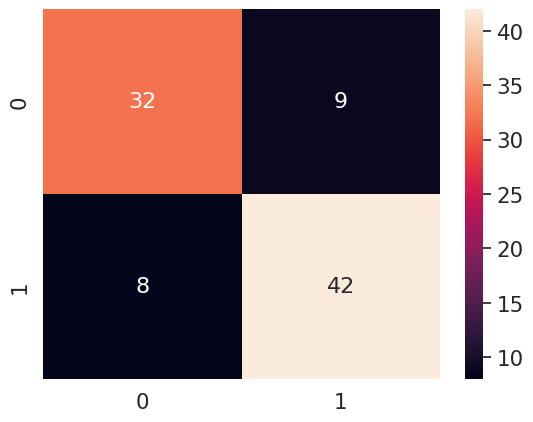

In [35]:
df_cm_svm = pd.DataFrame(cm_svm, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_svm, annot=True, annot_kws={"size": 16}) #font size


plt.show()

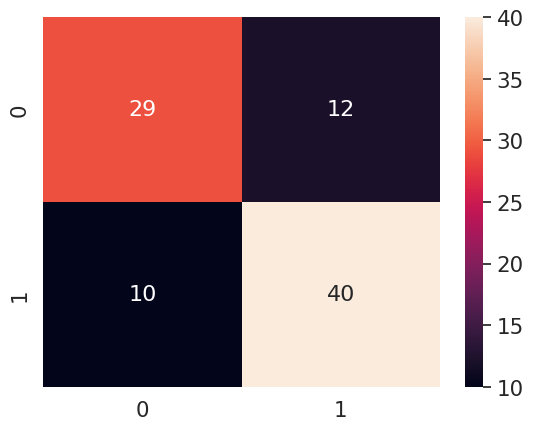

In [36]:
df_cm_rf = pd.DataFrame(cm_rf, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_rf, annot=True, annot_kws={"size": 16}) #font size

plt.show()

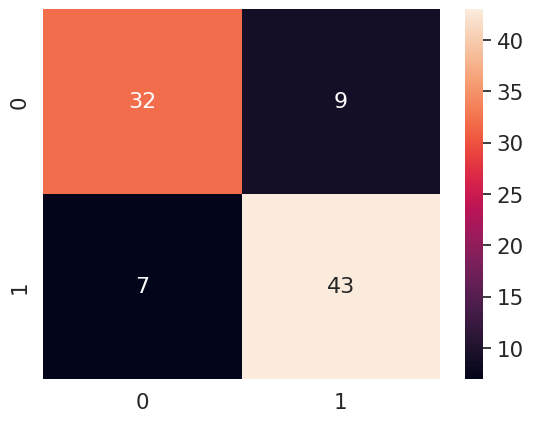

In [37]:
df_cm_knn = pd.DataFrame(cm_knn, range(2), range(2))
sns.set(font_scale=1.4) #label size
sns.heatmap(df_cm_knn, annot=True, annot_kws={"size": 16}) #font size

plt.show()